Modelling Linear Regression with Tenserflow and Keras.

The Boston Housing dataset is uded to predict the median price of a house based on a single attribute in the dataset (average number of rooms).

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
SEED_VALUE = 42

np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [3]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
print(X_train.shape)
print("\n")
print("Input features: ", X_train[0])
print("\n")
print("Output target: ", y_train[0])

(404, 13)


Input features:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Output target:  15.2


Estract features from the dataset:

In [4]:
# Store column index number
boston_features = {
    "Average Number of Rooms": 5,
}

X_train_1d = X_train[:, boston_features["Average Number of Rooms"]]
print(X_train_1d.shape)

X_test_1d = X_test[:, boston_features["Average Number of Rooms"]]

(404,)


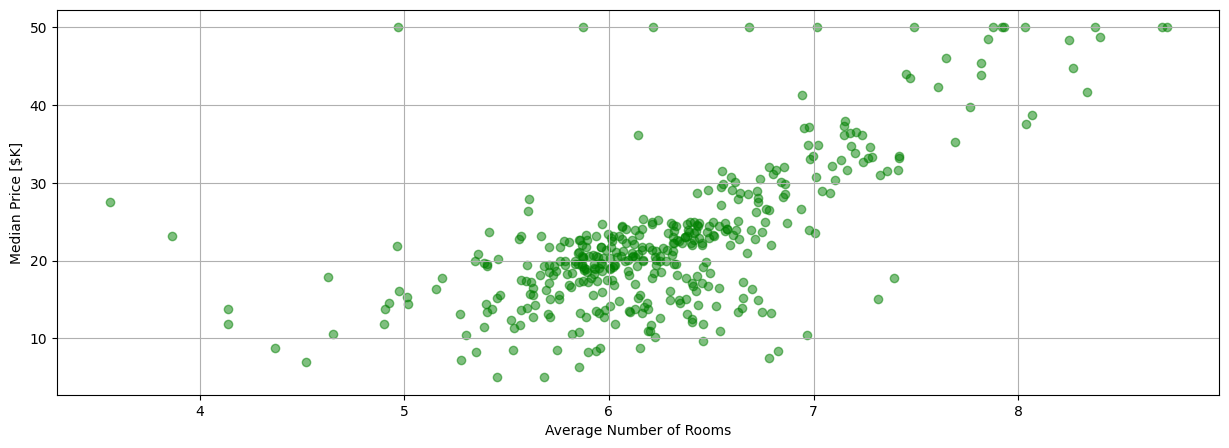

In [5]:
plt.figure(figsize=(15, 5))

plt.xlabel("Average Number of Rooms")
plt.ylabel("Median Price [$K]")
plt.grid("on")
plt.scatter(X_train_1d[:], y_train, color="green", alpha=0.5)

In [7]:
model = Sequential()

model.add(Dense(units=1, input_shape=(1,)))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005), loss="mse")

In [9]:
history = model.fit(
    X_train_1d, 
    y_train, 
    batch_size=16, 
    epochs=101, 
    validation_split=0.3,
)

AttributeError: module 'ml_dtypes' has no attribute 'float8_e3m4'
Epoch 1/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 336.4319 - val_loss: 429.5335
Epoch 2/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 309.8563 - val_loss: 405.2547
Epoch 3/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 289.5939 - val_loss: 382.5888
Epoch 4/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 270.5866 - val_loss: 360.8727
Epoch 5/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 252.4567 - val_loss: 340.0136
Epoch 6/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 235.1499 - val_loss: 319.9968
Epoch 7/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 218.6567 - val_loss: 300.8195
Epoch 8/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 202.9741 - val_loss: 282.4801
Epoch 9/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 188.0998 - val_loss: 264.9775
Epoch 10/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 174.0316 - val_loss: 248.3101
Epoch 11/101
18/18 ━━━━━━━━━━━━━━

In [11]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

In [12]:
# Predict the median price of a home with [3, 4, 5, 6, 7] rooms.
x = np.array([3, 4, 5, 6, 7]).reshape(-1, 1)
y_pred = model.predict(x)
for idx in range(len(x)):
    print(f"Predicted price of a home with {x[idx][0]} rooms: ${int(y_pred[idx][0] * 10) / 10}K")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Predicted price of a home with 3 rooms: $11.5K
Predicted price of a home with 4 rooms: $14.8K
Predicted price of a home with 5 rooms: $18.1K
Predicted price of a home with 6 rooms: $21.3K
Predicted price of a home with 7 rooms: $24.6K


In [13]:
# Generate feature data.
x = np.linspace(3, 9, 10)
y = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


In [14]:
def plot_data(x_data, y_data, x, y, title=None):
    
    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

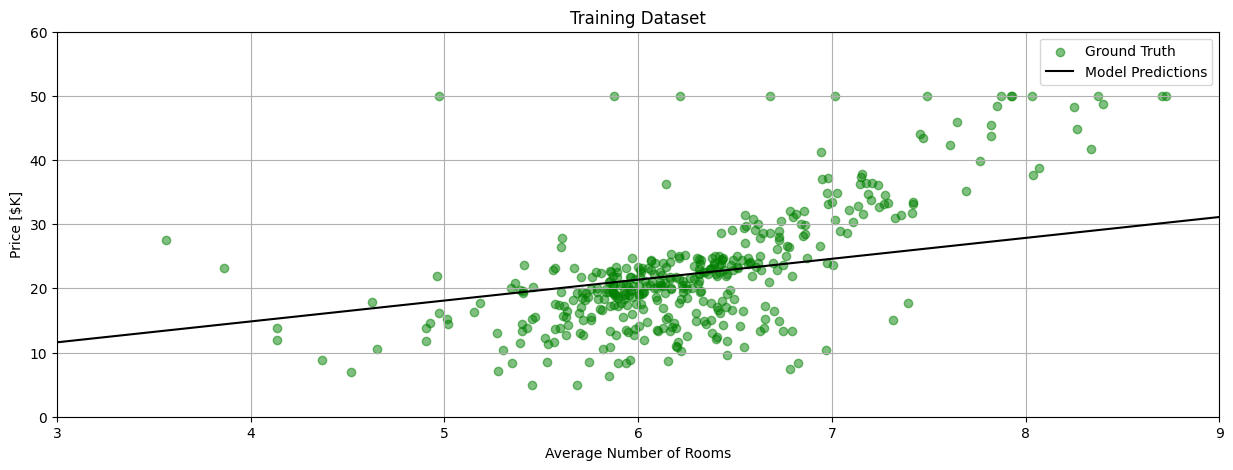

In [15]:
plot_data(X_train_1d, y_train, x, y, title='Training Dataset')

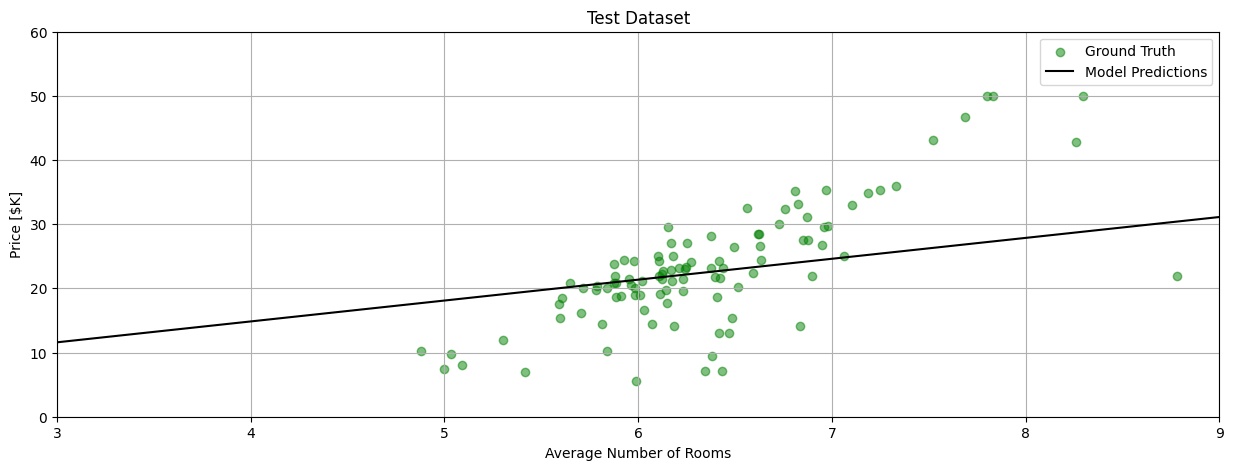

In [16]:
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')